In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the dataset
data = pd.read_csv("femaledataset.csv")
#print(data)
# Data preprocessing
X = data.drop(columns=["good/bad"])
y = data["good/bad"]




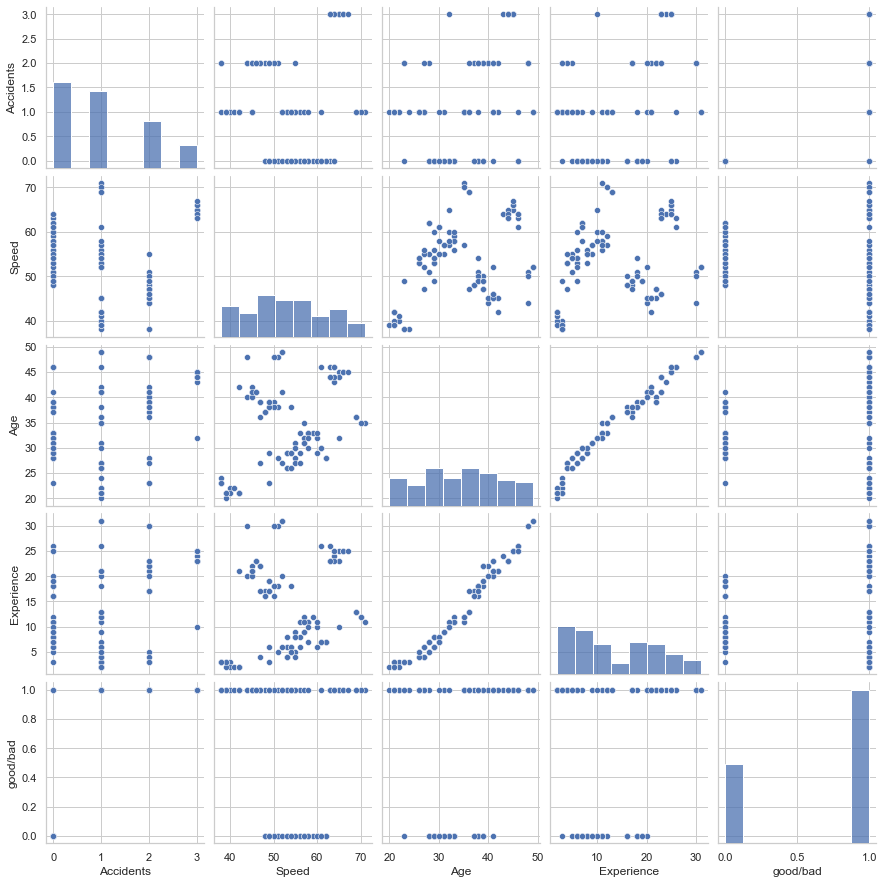

In [73]:
color_palette =  'red'

sns.pairplot(data,palette=color_palette)

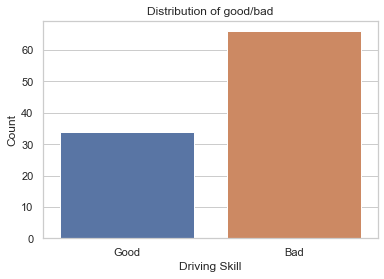

In [74]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="good/bad", data=data)
plt.xlabel("Driving Skill")
plt.ylabel("Count")
plt.title("Distribution of good/bad")
plt.xticks([0, 1], labels=["Good", "Bad"])

plt.show()

In [75]:
# Encode categorical variables (if needed) using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 2.10620642,  1.42181699, -0.26697308, -0.38667031, -0.61588176,
        -0.8819171 , -2.50454133, -0.55809982,  1.67616342, -0.11250879,
        -0.5       ],
       [ 0.02600255, -0.96278174,  0.84412877,  0.87358847,  1.62368828,
        -0.8819171 ,  0.3992747 , -0.55809982,  1.67616342, -0.11250879,
        -0.5       ],
       [ 0.02600255,  0.11028769, -1.00770765, -0.9595152 ,  1.62368828,
        -0.8819171 ,  0.3992747 , -0.55809982, -0.59660054, -0.11250879,
         2.        ],
       [-1.01409939, -0.60509193,  0.35030572,  0.30074357, -0.61588176,
         1.13389342,  0.3992747 , -0.55809982, -0.59660054, -0.11250879,
        -0.5       ],
       [-1.01409939, -0.48586199, -1.37807493, -1.18865316, -0.61588176,
        -0.8819171 ,  0.3992747 , -0.55809982,  1.67616342, -0.11250879,
        -0.5       ],
       [-1.01409939,  0.58720744, -0.14351732, -0.27210133, -0.61588176,
         1.13389342,  0.3992747 ,  1.79179416, -0.59660054, -0.11250879,
        -0.5  

In [81]:
# Model training
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [82]:
# Model evaluation
y_pred = model.predict(X_test)


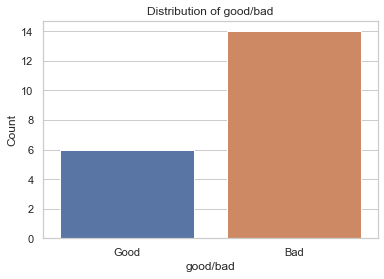

In [83]:


# Convert y_pred to a DataFrame
data = pd.DataFrame({'good/bad': y_pred})

# Create the countplot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="good/bad", data=data)
plt.xlabel("good/bad")
plt.ylabel("Count")
plt.title("Distribution of good/bad")
plt.xticks([0, 1], labels=["Good", "Bad"])

plt.show()

In [84]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])



In [87]:

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

